<a href="https://colab.research.google.com/github/bivash20/ml02/blob/main/Spam_Ham_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spamraw.csv')

In [3]:
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [4]:
df.shape

(5559, 2)

In [5]:
df.rename(columns = {'type':'target'},inplace=True)

In [6]:
df.sample()

,target,text
3654,ham,Ok... The theory test? when are u going to boo...


In [7]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [8]:
df['target'] = encoder.fit_transform(df['target'])

In [9]:
df.head()

,target,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,1,okmail: Dear Dave this is your final notice to...


In [10]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [11]:
#check for duplicates
df.duplicated().sum()

403

In [12]:
#remove duplicates
df = df.drop_duplicates(keep = 'first')

In [13]:

df.duplicated().sum()

0

**EDA**

In [14]:
df.head()

,target,text
0,0,Hope you are having a good week. Just checking in
1,0,K..give back my thanks.
2,0,Am also doing in cbe only. But have to pay.
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,1,okmail: Dear Dave this is your final notice to...


In [15]:
df['target'].value_counts()

0    4503
1     653
Name: target, dtype: int64

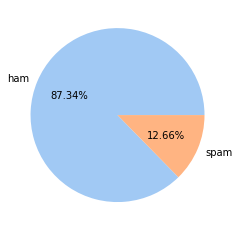

In [16]:
colors = sns.color_palette('pastel')[0:5]
plt.pie(df['target'].value_counts(),colors = colors,autopct = '%0.2f%%',labels = ['ham','spam'])
plt.show()

In [17]:
#As Data is unbalanced,we need to Treat The Data

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
df['num_char'] = df['text'].apply(len)

In [21]:
df.sample(3)

,target,text,num_char
4172,0,"Kate jackson rec center before 7ish, right?",43
1991,0,Was playng 9 doors game and gt racing on phone...,50
1904,0,Yeah whatever lol,17


In [22]:
#num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [23]:
df.head()

,target,text,num_char,num_words
0,0,Hope you are having a good week. Just checking in,49,11
1,0,K..give back my thanks.,23,5
2,0,Am also doing in cbe only. But have to pay.,43,12
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23
4,1,okmail: Dear Dave this is your final notice to...,161,31


In [24]:
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head()

,target,text,num_char,num_words,num_sent
0,0,Hope you are having a good week. Just checking in,49,11,2
1,0,K..give back my thanks.,23,5,1
2,0,Am also doing in cbe only. But have to pay.,43,12,2
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3
4,1,okmail: Dear Dave this is your final notice to...,161,31,3


In [26]:
spam = df[df.target == 1]
ham = df[df.target == 0]
#df['target' == 0].df[['num_char','num_words','num_sent']].describe()

In [27]:
spam

,target,text,num_char,num_words,num_sent
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3
4,1,okmail: Dear Dave this is your final notice to...,161,31,3
8,1,Marvel Mobile Play the official Ultimate Spide...,160,33,2
19,1,U can WIN £100 of Music Gift Vouchers every we...,157,23,1
34,1,U have won a nokia 6230 plus a free digital ca...,158,35,4
...,...,...,...,...,...
5521,1,"Get 3 Lions England tone, reply lionm 4 mono o...",156,33,3
5525,1,For ur chance to win a £250 cash every wk TXT:...,122,26,2
5551,1,Ur balance is now £500. Ur next question is: W...,125,32,4
5556,1,"If you don't, your prize will go to another cu...",145,32,2


In [28]:
ham

,target,text,num_char,num_words,num_sent
0,0,Hope you are having a good week. Just checking in,49,11,2
1,0,K..give back my thanks.,23,5,1
2,0,Am also doing in cbe only. But have to pay.,43,12,2
5,0,Aiya we discuss later lar... Pick u up at 4 is...,50,14,2
6,0,Are you this much buzy,22,5,1
...,...,...,...,...,...
5552,0,Already one guy loving you:-.,29,8,1
5553,0,Prepare to be pounded every night...,36,7,1
5554,0,You are a great role model. You are giving so ...,245,61,4
5555,0,"Awesome, I remember the last time we got someb...",88,19,1


In [29]:
spam[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.649311,27.531394,2.984686
std,29.825481,6.874489,1.495313
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,43.000000,9.000000


In [30]:
ham[['num_char','num_words','num_sent']].describe()

,num_char,num_words,num_sent
count,4503.000000,4503.000000,4503.000000
mean,70.104153,16.620919,1.822341
std,55.626264,12.711541,1.374215
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,196.000000,38.000000


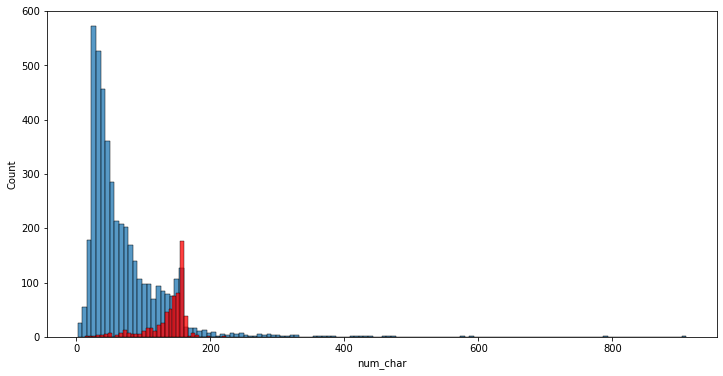

In [31]:
plt.figure(figsize=(12,6))
sns.histplot(ham.num_char)
sns.histplot(spam.num_char,color = 'red')
# Spam messages are of more characters than ham messages

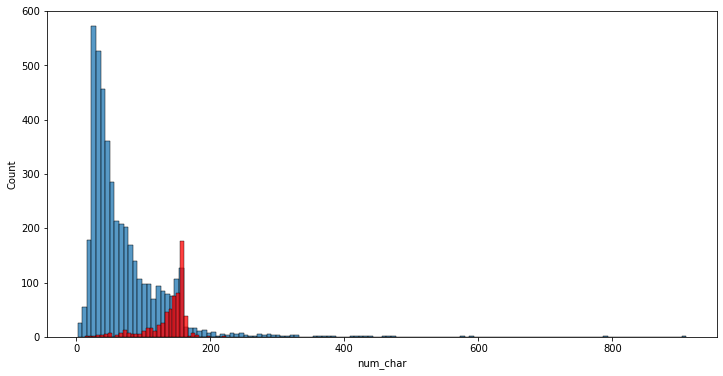

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(ham.num_char)
sns.histplot(spam.num_char,color = 'red')
# Spam messages contains more words than ham messages

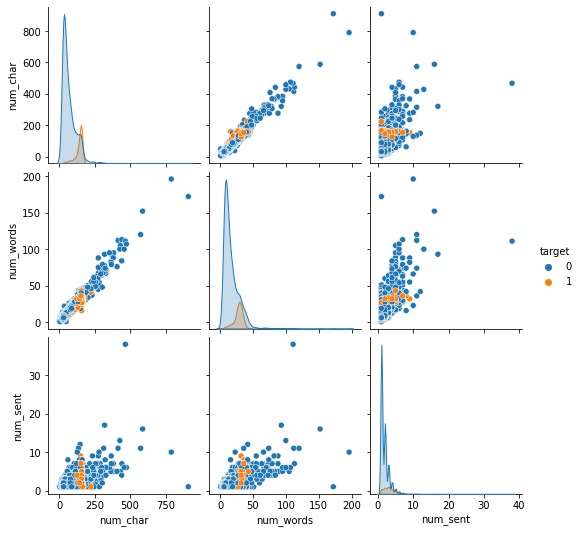

In [33]:
sns.pairplot(df,hue = 'target')
# here we see the relation between every new added feature
# and also we notice tht the data contains outliers

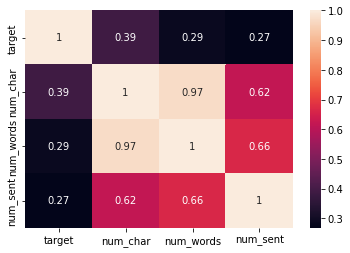

In [34]:
sns.heatmap(df.corr(),annot=True)

In [35]:
from nltk.corpus import stopwords
import string
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [36]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [37]:
transform_text('Hope you are having a good week. Just checking in')

'hope good week check'

In [38]:
df['text'][0]

'Hope you are having a good week. Just checking in'

In [39]:
df['transformed_text'] = df['text'].apply(transform_text)

In [40]:
df.head()

,target,text,num_char,num_words,num_sent,transformed_text
0,0,Hope you are having a good week. Just checking in,49,11,2,hope good week check
1,0,K..give back my thanks.,23,5,1,back thank
2,0,Am also doing in cbe only. But have to pay.,43,12,2,also cbe pay
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3,complimentari 4 star ibiza holiday cash need u...
4,1,okmail: Dear Dave this is your final notice to...,161,31,3,okmail dear dave final notic collect tenerif h...


In [45]:
from wordcloud import WordCloud
wc = WordCloud(width = 1000,height = 1000,min_font_size=10,background_color='white')

In [46]:
#We will build a WordCloud
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

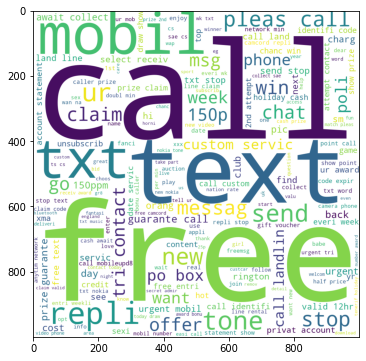

In [49]:
plt.figure(figsize = (12,6))
plt.imshow(spam_wc)

In [53]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

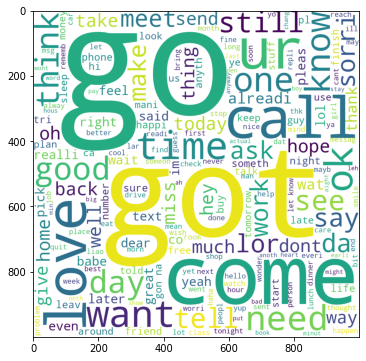

In [54]:
plt.figure(figsize = (12,6))
plt.imshow(ham_wc)

In [55]:
#Top 30 words of both spam and ham
df.head()

,target,text,num_char,num_words,num_sent,transformed_text
0,0,Hope you are having a good week. Just checking in,49,11,2,hope good week check
1,0,K..give back my thanks.,23,5,1,back thank
2,0,Am also doing in cbe only. But have to pay.,43,12,2,also cbe pay
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3,complimentari 4 star ibiza holiday cash need u...
4,1,okmail: Dear Dave this is your final notice to...,161,31,3,okmail dear dave final notic collect tenerif h...


In [58]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for words in msg.split():
    spam_corpus.append(words)

In [59]:
len(spam_corpus)

9922

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


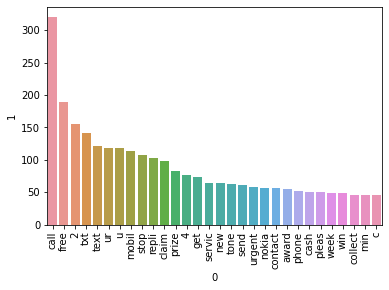

In [65]:
#we ll create a Dictionary on the most frequent words in the spam_corpus list
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for words in msg.split():
    ham_corpus.append(words)

In [67]:
len(ham_corpus)

34443

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


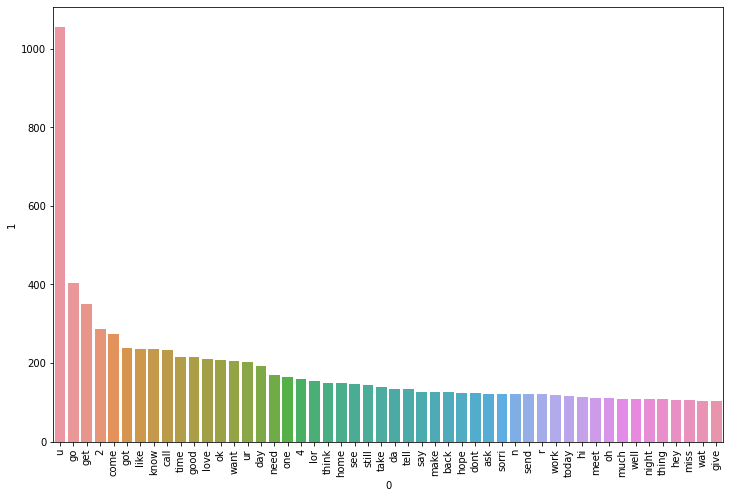

In [71]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(50))[0],pd.DataFrame(Counter(ham_corpus).most_common(50))[1])
plt.xticks(rotation='vertical')
fig = plt.gcf()
fig.set_size_inches(12, 8)

plt.show()

**Model Building**

In [72]:
#To convert text we need Text Vectorization using Bag of Words
df.head()

,target,text,num_char,num_words,num_sent,transformed_text
0,0,Hope you are having a good week. Just checking in,49,11,2,hope good week check
1,0,K..give back my thanks.,23,5,1,back thank
2,0,Am also doing in cbe only. But have to pay.,43,12,2,also cbe pay
3,1,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149,23,3,complimentari 4 star ibiza holiday cash need u...
4,1,okmail: Dear Dave this is your final notice to...,161,31,3,okmail dear dave final notic collect tenerif h...


In [73]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [74]:
X = cv.fit_transform(df['transformed_text']).toarray()

In [83]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [76]:
y = df['target'].values

In [84]:
y

array([0, 0, 0, ..., 1, 1, 0])

**Train Test Split**

In [85]:
from sklearn.model_selection import train_test_split


In [86]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 2)

In [89]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [90]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [93]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8449612403100775
[[754 142]
 [ 18 118]]
0.45384615384615384


In [94]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9738372093023255
[[880  16]
 [ 11 125]]
0.8865248226950354


In [95]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9670542635658915
[[894   2]
 [ 32 104]]
0.9811320754716981
